In [130]:
import igraph as ig
import numpy as np
import louvain
import time

print("Construct the graph from the txt file (edgelist)")

# select below the network you want

########################
Polblogs
name = "pol_blogs"
input = np.loadtxt("../data/PolBlogs/PolBlogsAdj.txt", dtype='i', delimiter='\t')
dim = input.shape
N = dim[0]

g = ig.Graph()
g.add_vertices(N)
for i in range(0, N-1):
    for j in range(0,N-1):
        if input[i,j]==1:
            g.add_edges([(i,j)])
            
ig.summary(g)
########################
# # Wikivote
# name = "wikivote"
# input = np.loadtxt("../data/Wikivote/wiki-Vote.txt", dtype='i', delimiter='\t')
# dim = input.shape
# g = ig.Graph()
# N = input.max()
# g.add_vertices(N)
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)])
#     #if np.mod(i,100)==0: 
#      #   print(i)
# ig.summary(g)
########################
# PowerEU
# name = "power_eu"
# input = np.loadtxt("../data/PowerEU/ElistPowerEU.txt", dtype='i', delimiter=' ')
# dim = input.shape
# N = input.max()
# g = ig.Graph()
# g.add_vertices(N)
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)])
# ig.summary(g)
########################
# CondMat2003
# name = "condmat2003"
# g = ig.Graph.Read_Ncol('../data/CondMat2003/CondMat2003EList.txt', directed=False)
########################
# # Internet
# name = "internet"
# g = ig.Graph.Read_Ncol('../data/Internet/InternetElist.txt', directed=False)
########################
# # PowerUS
# name="power_us"
# input = np.loadtxt("../data/PowerUS/ElistPowerUS.txt", dtype='i', delimiter=' ')
# dim = input.shape
# N = input.max()
# g = ig.Graph()
# g.add_vertices(N)
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)])
# ig.summary(g)
########################
# # Facebook
# name = "facebook"
# g = ig.Graph.Read_Ncol('../data/Facebook/facebook-gender_edges.txt', directed=False)
########################
# # Pokec
# name="pokec"
# g = ig.Graph.Read_Ncol('../data/Pokec/soc-pokec-relationships.txt', directed=False)
########################

# selects largest connected component

print("Largest connected component")
largest = g.clusters().giant();
N = largest.vcount()
ig.summary(largest)
# save cc in txt
ig.write(largest,filename="edge_lists/"+name+"_largest.txt",format = "edgelist")

Construct the graph from the txt file (edgelist)
Largest connected component


/var/folders/b7/w5j5st2x5d9f77725jtxfcqh0000gn/T/ipykernel_10225/1768754939.py:81: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  largest = g.clusters().giant();


IGRAPH UN-- 1632803 30622564 -- 
+ attr: name (v)


# Louvain

In [131]:
print("Running Louvain 1 times in C++")
start_time = time.time()

part = louvain.find_partition(largest, louvain.ModularityVertexPartition);

        
print("--- %s seconds ---" % (time.time() - start_time))

print("Modularity :",part.modularity)
print("Sizes of the groups:", part.sizes())
print("Nb of  groups:", len(part.sizes()))

# print("Running Louvain 10 times in C++")
# start_time = time.time()

# m_best =0;
# part_best = louvain.find_partition(largest, louvain.ModularityVertexPartition);


# for n in range(10):
#     part = louvain.find_partition(largest, louvain.ModularityVertexPartition);
#     m = part.modularity;

#     if m_best<m:
#         m_best = m;
#         part_best = part;
        

# print("--- %s seconds ---" % (time.time() - start_time))

# print("Modularity :",part_best.modularity)
# print("Sizes of the groups:", part_best.sizes())

Running Louvain 1 times in C++
--- 826.6801271438599 seconds ---
Modularity : 0.7319901213526793
Sizes of the groups: [265979, 143799, 103725, 99699, 94679, 90663, 89864, 88526, 84836, 80341, 79562, 78713, 55730, 55621, 41945, 36569, 34168, 34045, 31387, 25649, 16713, 162, 85, 61, 32, 30, 24, 20, 18, 16, 15, 14, 13, 12, 11, 10, 9, 9, 8, 8, 7, 7, 5, 5, 5, 4]
Nb of  groups: 46


# Node2Vec follows by k-means

In [138]:
# node2vec embedding with the original code 
# https://github.com/aditya-grover/node2vec
# simply adapted to be compatible with python3

if name=="pol_blogs":
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/pol_blogs_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="power_eu":
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/power_eu_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="wikivote":
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/wikivote_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="condmat2003":
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/condmat2003_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="power_us":
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/power_us_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="internet": 
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/internet_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="internet": 
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/internet_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))
elif name=="facebook": 
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/facebook_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time))

elif name=="pokec": 
    start_time = time.time()
    !python3 node2vec-master/src/main.py --dimensions 32 --input edge_lists/pokec_largest.txt --output emb/output.txt
    print("--- %s seconds ---" % (time.time() - start_time)) 
    
print("Loading embedding vectors")

input = np.loadtxt("emb/output.txt", skiprows=1) # row 1 contains nb of nodes and nb of edges
id = input[:,0] # id of each node
inv_perm = np.argsort(id)
embed_vectors = input[inv_perm,1:]

^C
--- 759.9523482322693 seconds ---
Loading embedding vectors


In [134]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca.fit(embed_vectors)
#print(pca.singular_values_)
embedding = pca.transform(embed_vectors)

max_nb_clusters = 50
modularities = [] 
for k in range(1,max_nb_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(embed_vectors)
    community = kmeans.labels_
    mod_partition = largest.modularity(community)
    modularities.append(mod_partition)

modularities = np.array(modularities)

print("nb communities %s " % np.argmax(modularities))
print("modularity %s " % np.max(modularities))

InternalError: Error at src/community/modularity.c:132: Membership vector size differs from number of vertices. -- Invalid value

<function matplotlib.pyplot.show(close=None, block=None)>

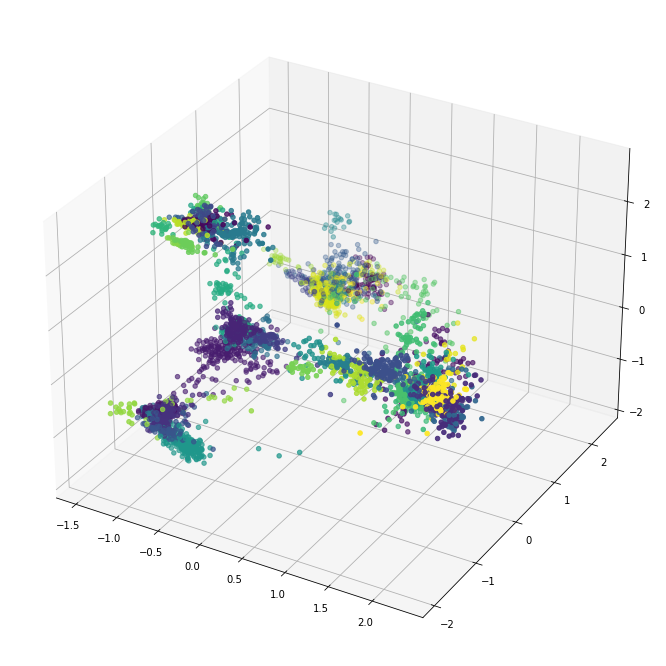

In [ ]:
x=embedding[:,0]
y=embedding[:,1]
z=embedding[:,2]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z,c=community)
plt.show